# Week 1 授業課題1 曽呂利新左衛門問題

# 【問題1】100日目の米粒の数  
>100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

100日目におけるもらった米粒の合計は1267650600228229401496703205375粒です。


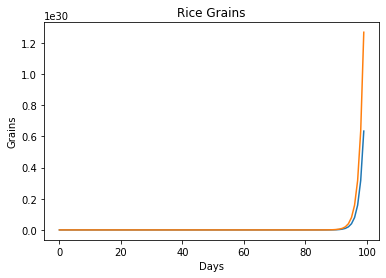

In [14]:
import matplotlib.pyplot as plt

# 米粒を受け取る日数
DAYS = 100

# 計算用のリストを作成（受け取る米粒を入れるリストと累計のリスト）
rice_grains = []
total_grains = []

# 初日に受け取る米粒をリストに代入
rice_grains.append(1)
total_grains.append(1)

# 米粒の累計を求める
for i in range(1, DAYS):
    rice_grains.append(rice_grains[-1]*2)
    total_grains.append(sum(rice_grains))
    
# 答え
print("100日目におけるもらった米粒の合計は{}粒です。".format(total_grains[-1]))    

# グラフ化する。
%matplotlib inline
plt.title("Rice Grains")
plt.xlabel("Days")
plt.ylabel("Grains")
plt.plot(rice_grains)
plt.plot(total_grains)
plt.show()

## 【問題2】100日目以外の米粒の数  
>この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。  
>以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

コースを受講する日数の間にもらえる米粒は31粒です。


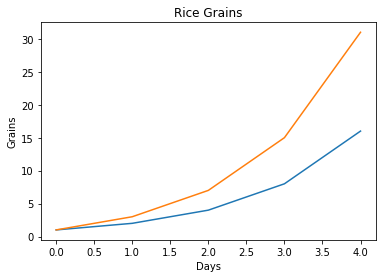

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    rice_grains: list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    total_grains: list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """
    # 計算用のリストを作成（受け取る米粒を入れるリストと累計のリスト）
    rice_grains = []
    total_grains = []
    
    # 初日に受け取る米粒をリストに代入
    rice_grains.append(1)
    total_grains.append(1)
    
    # 米粒の累計を求める
    for i in range(1,day):
        rice_grains.append(rice_grains[-1]*2)
        total_grains.append(sum(rice_grains))
        
    return rice_grains, total_grains


# 調べたい日数を入れる
CLASS_DAYS = 31 + 30 + 31 + 31

# test
CLASS_DAYS = 5

# 計算。結果とグラフ用の日数を変数に代入。
rice_grains, total_grains = compute_sorori_shinzaemon(day=CLASS_DAYS)
    
# 答え
print("コースを受講する日数の間にもらえる米粒は{}粒です。".format(total_grains[-1]))    


# グラフ表示
%matplotlib inline
plt.title("Rice Grains")
plt.xlabel("Days")
plt.ylabel("Grains")
plt.plot(rice_grains) 
plt.plot(total_grains) 

plt.show()

## 【問題3】貰える米で何人が何日生活できるか  
>この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。  
>関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。  
>ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

In [11]:
import matplotlib.pyplot as plt


def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    lastday_total_grains : int
        最終日のもらった米粒の累計値
    """
    # 計算用のリストを作成
    rice_grains = []
    total_grains = []
    
    # 初日に受け取る米粒をリストに代入
    rice_grains.append(1)
    total_grains.append(1)
    
    # 米粒の類型を求める
    for i in range(1,day):
        rice_grains.append(rice_grains[-1]*2)
        total_grains.append(sum(rice_grains))
        
    # 最終日におけるもらった米粒の合計を変数に代入
    lastday_total_grains = total_grains[-1]
    
    return lastday_total_grains


def live_days(rice_grains: int, person: int):
    """
    米粒と人数を入力すると何日間生きられるか計算する関数。
    大人が１日に食べるのが２合。１合が６０００粒なので一日１２０００粒食べると仮定して作成。

    Parameteres
    --------------
    rice_grains: int
        現在ある米粒の数
        
    person: int
        受講生の人数

    Returns
    --------------
    rdays : list
        米粒と人数から計算した生活できる日数
    """
    # 一般的な日本人が１日に食べる米粒量
    ONEDAY_RICE_GRAIN = 12000
    
    # 日数計算
    days = int(rice_grains/ONEDAY_RICE_GRAIN/person)
    
    return days



# 調べたい日数を入れる
CLASS_DAYS = 31 + 30 + 31 + 31

# 調べたい人数を入れる
MEMBERS = 9

# 作成した関数を使って、トータルの米粒を変数に代入。
total_grains = compute_sorori_shinzaemon(day=CLASS_DAYS)

# 作成した関数を使って、生きることができる日数を計算。
answer_days = live_days(total_grains, MEMBERS)

# 答え
print("コース受講中にもらった米粒でメンバー{}人が生活できるのは{}日です。".format(MEMBERS, answer_days))



コース受講中にもらった米粒でメンバー9人が生活できるのは98461333021104878187994584973312日です。
